# 逻辑斯蒂回归

## 【关键词】Logistics函数，最大似然估计，梯度下降法

## 1、Logistics回归的原理

利用Logistics回归进行分类的主要思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。这里的“回归” 一词源于最佳拟合，表示要找到最佳拟合参数集。

训练分类器时的做法就是寻找最佳拟合参数，使用的是最优化算法。接下来介绍这个二值型输出分类器的数学原理

Logistic Regression和Linear Regression的原理是相似的，可以简单的描述为这样的过程：

（1）找一个合适的预测函数，一般表示为h函数，该函数就是我们需要找的分类函数，它用来预测输入数据的判断结果。这个过程是非常关键的，需要对数据有一定的了解或分析，知道或者猜测预测函数的“大概”形式，比如是线性函数还是非线性函数。

（2）构造一个Cost函数（损失函数），该函数表示预测的输出（h）与训练数据类别（y）之间的偏差，可以是二者之间的差（h-y）或者是其他的形式。综合考虑所有训练数据的“损失”，将Cost求和或者求平均，记为J(θ)函数，表示所有训练数据预测值与实际类别的偏差。

（3）显然，J(θ)函数的值越小表示预测函数越准确（即h函数越准确），所以这一步需要做的是找到J(θ)函数的最小值。找函数的最小值有不同的方法，Logistic Regression实现时有梯度下降法（Gradient Descent）。


### 1)  构造预测函数

Logistic Regression虽然名字里带“回归”，但是它实际上是一种分类方法，用于两分类问题（即输出只有两种）。首先需要先找到一个预测函数（h），显然，该函数的输出必须是两类值（分别代表两个类别），所以利用了*Logistic函数（或称为Sigmoid函数）*，函数形式为：

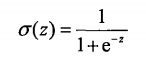

该函数形状为：

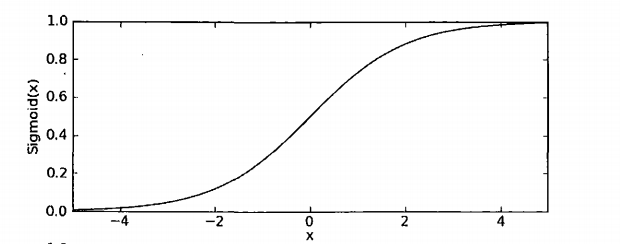

预测函数可以写为：

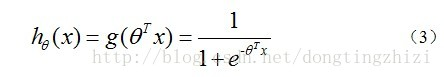

### 2）构造损失函数

Cost函数和J(θ)函数是基于*最大似然估计*推导得到的。

每个样本属于其真实标记的概率，即似然函数，可以写成：

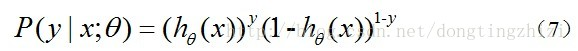

所有样本都属于其真实标记的概率为

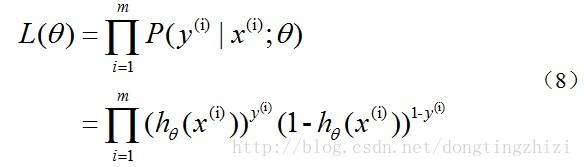

对数似然函数为

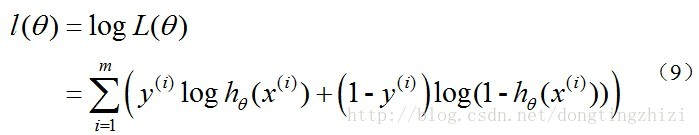

最大似然估计就是要求得使l(θ)取最大值时的θ，其实这里可以使用梯度上升法求解，求得的θ就是要求的最佳参数

### 3) 梯度下降法求J(θ)的最小值

求J(θ)的最小值可以使用*梯度下降法*，根据梯度下降法可得θ的更新过程:

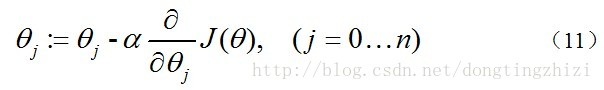

式中为α学习步长，下面来求偏导：

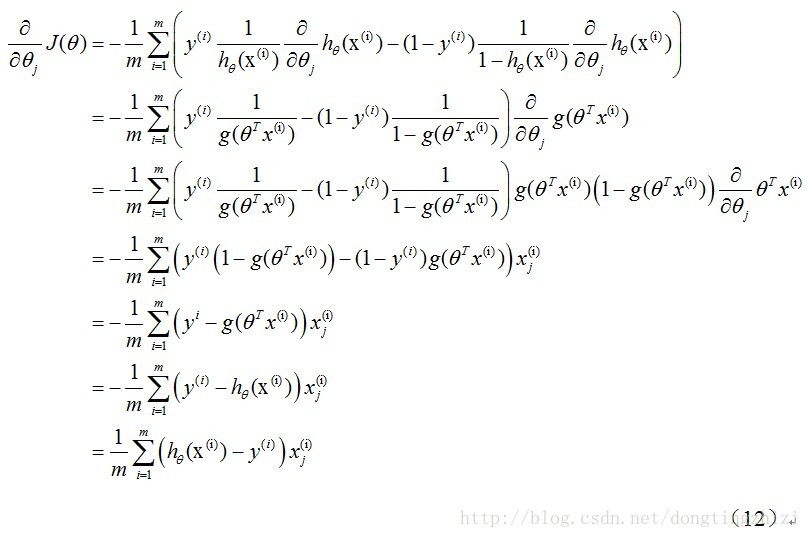

上式求解过程中用到如下的公式：

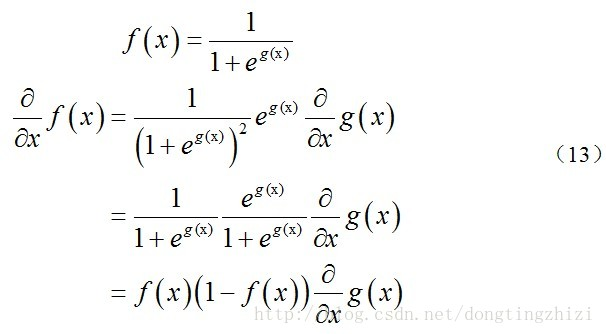

因此，θ的更新过程可以写成:

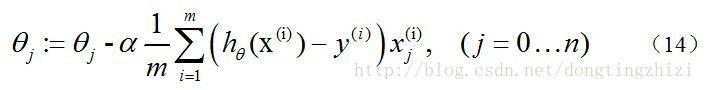

因为式中α本来为一常量，所以1/m一般将省略，所以最终的θ更新过程为：

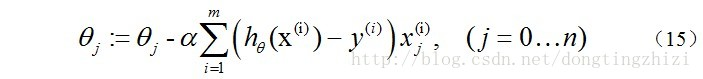

## 2、实战

`
sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
`

solver参数的选择：
- “liblinear”：小数量级的数据集
- “lbfgs”, “sag” or “newton-cg”：大数量级的数据集以及多分类问题
- “sag”：极大的数据集

### 1) 手写数字数据集的分类

使用KNN与Logistic回归两种方法

In [1]:
from sklearn.linear_model import LogisticRegression

In [3]:
import sklearn.datasets as datasets

In [4]:
digits = datasets.load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [5]:
data = digits.data
target = digits.target
data.shape

(1797, 64)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

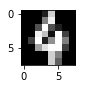

In [11]:
plt.figure(figsize=(1,1))
plt.imshow(data[100].reshape((8,8)),cmap="gray")

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.02)

In [14]:
lgr = LogisticRegression()

In [15]:
lgr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
lgr.predict(x_test)

array([6, 9, 4, 5, 1, 9, 7, 0, 4, 1, 3, 6, 9, 7, 5, 2, 2, 8, 7, 7, 4, 2, 0,
       7, 5, 6, 1, 4, 3, 4, 8, 0, 7, 0, 1, 5])

In [17]:
lgr.score(x_test,y_test)

1.0

In [22]:
lgr.score(x_train,y_train)

0.99375354911981828

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
knn.score(x_test,y_test)

1.0

In [21]:
knn.score(x_train,y_train)

0.99034639409426461

### 2) 使用make_blobs产生数据集进行分类

In [34]:
data,target = datasets.make_blobs(n_samples=150,n_features=2,random_state=1,centers=4)

In [30]:
data.shape

(150, 2)

In [31]:
target

array([2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1,
       1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 2,
       1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0,
       0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1])

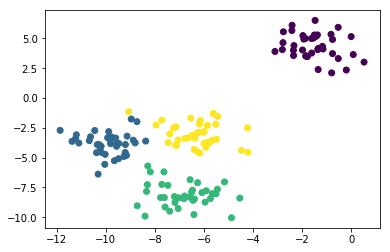

In [35]:
plt.scatter(data[:,0],data[:,1],c=target)

In [36]:
import numpy as np

In [40]:
# 对以上四类点进行区域划分
ymin,ymax = data[:,1].min(),data[:,1].max()
xmin,xmax = data[:,0].min(),data[:,0].max()

x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)

xx,yy = np.meshgrid(x,y)
xy = np.c_[xx.ravel(),yy.ravel()]
xy.shape

(10000, 2)

In [47]:
lgr = LogisticRegression()
lgr.fit(data,target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y_ = lgr.predict(xy)

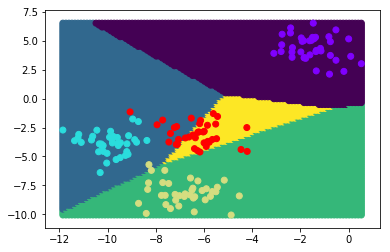

In [49]:
plt.scatter(xy[:,0],xy[:,1],c=y_)
plt.scatter(data[:,0],data[:,1],c=target,cmap="rainbow")

In [41]:
knn = KNeighborsClassifier()
knn.fit(data,target)
y_ = knn.predict(xy)

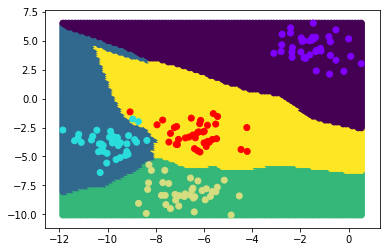

In [46]:
plt.scatter(xy[:,0],xy[:,1],c=y_)
plt.scatter(data[:,0],data[:,1],c=target,cmap="rainbow")

In [2]:
import pandas as pd

In [3]:
# 预测癌细胞
axb = open('../data/癌细胞数据.csv')
data = pd.read_csv(axb)
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Ashesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
data.shape

(699, 11)

In [6]:
import numpy as np

In [7]:
# 吧所有‘？’替换为nan
data.replace(to_replace="?",value=np.nan,inplace=True)
data.dropna(how="any",inplace=True)

In [8]:
data.isnull().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Ashesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [9]:
# 提取出标签和特征
data.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Ashesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [10]:
x = data[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Ashesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']]
y = data[['Class']]

In [11]:
# 数据标准化
from sklearn.preprocessing import StandardScaler


In [12]:
ss = StandardScaler()

In [18]:
x_train = ss.fit_transform(x_train)
x_train

array([[-1.21533608, -0.35186351, -0.38352366, ..., -0.9862878 ,
        -0.60165977, -0.33843645],
       [ 0.18996779,  0.31288786,  0.63295199, ..., -0.15444617,
         1.04900645, -0.33843645],
       [-1.21533608, -0.68423919, -0.72234887, ..., -0.9862878 ,
        -0.60165977, -0.33843645],
       ..., 
       [-1.21533608, -0.35186351, -0.04469844, ..., -0.15444617,
        -0.60165977, -0.33843645],
       [-0.51268415, -0.68423919, -0.72234887, ..., -0.9862878 ,
        -0.60165977, -0.33843645],
       [ 0.89261972, -0.01948782, -0.38352366, ...,  0.67739547,
         0.38873996,  1.42258034]])

In [39]:
x_test = ss.fit(x_train).transform(x_test)
x_test

array([[  9.,   5.,   5.,   2.,   2.,   2.,   5.,   1.,   1.],
       [  5.,  10.,  10.,  10.,  10.,  10.,  10.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   2.,   1.,   3.,   1.,   1.],
       [  7.,   2.,   4.,   1.,   6.,  10.,   5.,   4.,   3.],
       [  5.,   4.,   6.,   6.,   4.,  10.,   4.,   3.,   1.],
       [  5.,   6.,   5.,   6.,  10.,   1.,   3.,   1.,   1.],
       [  3.,   1.,   1.,   1.,   2.,   1.,   2.,   1.,   1.],
       [  3.,   1.,   1.,   3.,   2.,   1.,   2.,   1.,   1.],
       [  4.,   1.,   1.,   1.,   2.,   1.,   3.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   2.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   2.,   1.,   2.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   3.,   1.,   1.],
       [  3.,   1.,   1.,   2.,   3.,   4.,   1.,   1.,   1.],
       [  3.,   3.,   5.,   2.,   3.,  10.,   7.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   2.,   1.,   3.,   1.,   1.],
       [  6.,  10.,   7.,   7.,   6.,   4.,   8.,  10.,

In [40]:
x_train,x_test

(array([[-1.21533608, -0.35186351, -0.38352366, ..., -0.9862878 ,
         -0.60165977, -0.33843645],
        [ 0.18996779,  0.31288786,  0.63295199, ..., -0.15444617,
          1.04900645, -0.33843645],
        [-1.21533608, -0.68423919, -0.72234887, ..., -0.9862878 ,
         -0.60165977, -0.33843645],
        ..., 
        [-1.21533608, -0.35186351, -0.04469844, ..., -0.15444617,
         -0.60165977, -0.33843645],
        [-0.51268415, -0.68423919, -0.72234887, ..., -0.9862878 ,
         -0.60165977, -0.33843645],
        [ 0.89261972, -0.01948782, -0.38352366, ...,  0.67739547,
          0.38873996,  1.42258034]]),
 array([[  9.,   5.,   5.,   2.,   2.,   2.,   5.,   1.,   1.],
        [  5.,  10.,  10.,  10.,  10.,  10.,  10.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   2.,   1.,   3.,   1.,   1.],
        [  7.,   2.,   4.,   1.,   6.,  10.,   5.,   4.,   3.],
        [  5.,   4.,   6.,   6.,   4.,  10.,   4.,   3.,   1.],
        [  5.,   6.,   5.,   6.,  10.,   1.,   3.,  

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [22]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [23]:
sgd = SGDClassifier()

C:\Users\lele\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [24]:
sgd.fit(x_train,y_train)

C:\Users\lele\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [41]:
sgd.predict(x_test)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [42]:
sgd.score(x_test,y_test)

0.43478260869565216

In [28]:
lgr = LogisticRegression()

In [29]:
lgr.fit(x_train,y_train)

C:\Users\lele\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
lgr.score(x_test,y_test)

0.43478260869565216

## 3、作业

#### 【第1题】预测年收入是否大于50K美元

读取adult.txt文件，并使用逻辑斯底回归算法训练模型，根据种族、职业、工作时长来预测一个人的性别

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('../data/adults.txt')
df

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [37]:
data = df[['race','occupation','hours_per_week']]
data

,race,occupation,hours_per_week
0,White,Adm-clerical,40
1,White,Exec-managerial,13
2,White,Handlers-cleaners,40
3,Black,Handlers-cleaners,40
4,Black,Prof-specialty,40
5,White,Exec-managerial,40
6,Black,Other-service,16
7,White,Exec-managerial,45
8,White,Prof-specialty,50
9,White,Exec-managerial,40


In [71]:
data.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [74]:
data.race.replace(to_replace=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], value=[1,2,3,4,5],inplace=True)

C:\Users\lele\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [75]:
data

,race,occupation,hours_per_week
0,1,Adm-clerical,40
1,1,Exec-managerial,13
2,1,Handlers-cleaners,40
3,2,Handlers-cleaners,40
4,2,Prof-specialty,40
5,1,Exec-managerial,40
6,2,Other-service,16
7,1,Exec-managerial,45
8,1,Prof-specialty,50
9,1,Exec-managerial,40


In [76]:
data.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [82]:
data.occupation.replace(to_replace=['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], value=np.arange(1,16),inplace=True)

C:\Users\lele\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [83]:
data

,race,occupation,hours_per_week
0,1,1,40
1,1,2,13
2,1,3,40
3,2,3,40
4,2,4,40
5,1,2,40
6,2,5,16
7,1,2,45
8,1,4,50
9,1,2,40


In [84]:
target = df[['sex']]
target

,sex
0,Male
1,Male
2,Male
3,Male
4,Female
5,Female
6,Female
7,Male
8,Female
9,Male


In [44]:
from sklearn.linear_model import LogisticRegression

In [86]:
lgr = LogisticRegression()

In [46]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(data,target)

In [88]:
lgr.fit(x_train,y_train)

C:\Users\lele\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
lgr.predict(x_test)

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Male'], dtype=object)

In [90]:
lgr.score(x_test,y_test)

0.67706669942267539

In [91]:
from sklearn.linear_model import SGDClassifier

In [92]:
sgc = SGDClassifier()

C:\Users\lele\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [93]:
sgc.fit(x_train,y_train)

C:\Users\lele\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [94]:
sgc.score(x_test,y_test)

0.67411865864144449

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier()

In [97]:
knn.fit(x_train,y_train)

C:\Users\lele\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [98]:
knn.score(x_test,y_test)

0.7193219506203169

#### 【第2题】从疝气病症预测病马的死亡率

In [52]:
train = pd.read_table('../data/horseColicTraining.txt',header=None)
train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,0.0,2.0,5.0,...,0.0,0.0,0.0,3.0,5.0,45.0,8.4,0.0,0.0,0.0
1,1.0,1.0,39.2,88.0,20.0,0.0,0.0,4.0,1.0,3.0,...,0.0,0.0,0.0,4.0,2.0,50.0,85.0,2.0,2.0,0.0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,0.0,0.0,0.0,1.0,1.0,33.0,6.7,0.0,0.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,1.0,2.0,5.0,3.0,0.0,48.0,7.2,3.0,5.3,0.0
4,2.0,1.0,37.3,104.0,35.0,0.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74.0,7.4,0.0,0.0,0.0
5,2.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,...,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0
6,1.0,1.0,37.9,48.0,16.0,1.0,1.0,1.0,1.0,3.0,...,1.0,1.0,0.0,3.0,5.0,37.0,7.0,0.0,0.0,1.0
7,1.0,1.0,0.0,60.0,0.0,3.0,0.0,0.0,1.0,0.0,...,2.0,1.0,0.0,3.0,4.0,44.0,8.3,0.0,0.0,0.0
8,2.0,1.0,0.0,80.0,36.0,3.0,4.0,3.0,1.0,4.0,...,2.0,1.0,0.0,3.0,5.0,38.0,6.2,0.0,0.0,0.0
9,2.0,9.0,38.3,90.0,0.0,1.0,0.0,1.0,1.0,5.0,...,2.0,1.0,0.0,3.0,0.0,40.0,6.2,1.0,2.2,1.0


In [53]:
test = pd.read_table('../data/horseColicTest.txt',header=None)
test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2,1,38.5,54,20,0,1,2,2,3,...,2,2,5.9,0,2,42.0,6.3,0,0.0,1
1,2,1,37.6,48,36,0,0,1,1,0,...,0,0,0.0,0,0,44.0,6.3,1,5.0,1
2,1,1,37.7,44,28,0,4,3,2,5,...,1,1,0.0,3,5,45.0,70.0,3,2.0,1
3,1,1,37.0,56,24,3,1,4,2,4,...,1,1,0.0,0,0,35.0,61.0,3,2.0,0
4,2,1,38.0,42,12,3,0,3,1,1,...,0,0,0.0,0,2,37.0,5.8,0,0.0,1
5,1,1,0.0,60,40,3,0,1,1,0,...,3,2,0.0,0,5,42.0,72.0,0,0.0,1
6,2,1,38.4,80,60,3,2,2,1,3,...,2,2,0.0,1,1,54.0,6.9,0,0.0,1
7,2,1,37.8,48,12,2,1,2,1,3,...,2,0,0.0,2,0,48.0,7.3,1,0.0,1
8,2,1,37.9,45,36,3,3,3,2,2,...,2,1,0.0,3,0,33.0,5.7,3,0.0,1
9,2,1,39.0,84,12,3,1,5,1,2,...,1,2,7.0,0,4,62.0,5.9,2,2.2,0


In [60]:
x_train,y_train = train[train.columns[0:21]], train[[21]]

In [62]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,0.0,2.0,5.0,...,4.0,0.0,0.0,0.0,3.0,5.0,45.0,8.4,0.0,0.0
1,1.0,1.0,39.2,88.0,20.0,0.0,0.0,4.0,1.0,3.0,...,2.0,0.0,0.0,0.0,4.0,2.0,50.0,85.0,2.0,2.0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,33.0,6.7,0.0,0.0
3,1.0,9.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,4.0,1.0,2.0,5.0,3.0,0.0,48.0,7.2,3.0,5.3
4,2.0,1.0,37.3,104.0,35.0,0.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74.0,7.4,0.0,0.0
5,2.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,...,2.0,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
6,1.0,1.0,37.9,48.0,16.0,1.0,1.0,1.0,1.0,3.0,...,3.0,1.0,1.0,0.0,3.0,5.0,37.0,7.0,0.0,0.0
7,1.0,1.0,0.0,60.0,0.0,3.0,0.0,0.0,1.0,0.0,...,2.0,2.0,1.0,0.0,3.0,4.0,44.0,8.3,0.0,0.0
8,2.0,1.0,0.0,80.0,36.0,3.0,4.0,3.0,1.0,4.0,...,4.0,2.0,1.0,0.0,3.0,5.0,38.0,6.2,0.0,0.0
9,2.0,9.0,38.3,90.0,0.0,1.0,0.0,1.0,1.0,5.0,...,1.0,2.0,1.0,0.0,3.0,0.0,40.0,6.2,1.0,2.2


In [63]:
x_test,y_test = test[test.columns[0:21]], test[[21]]

In [64]:
lgr = LogisticRegression()

In [65]:
lgr.fit(x_train,y_train)

C:\Users\lele\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
y_ = lgr.predict(x_test)

In [68]:
display(y_,y_test)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.])

,21
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,1
8,1
9,0


In [69]:
lgr.score(x_test,y_test)

0.73134328358208955